# <u><center>**Book Recommendation System**</center></u>

#Import Library

In [ ]:
!pip install scikit-surprise
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, confusion_matrix,accuracy_score,f1_score,roc_curve, roc_auc_score,classification_report,precision_score, recall_score
from sklearn.model_selection import train_test_split
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

import ast

from sklearn.metrics.pairwise import cosine_similarity

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors

from scipy.sparse import csr_matrix

from surprise import Reader, Dataset

from surprise.model_selection import train_test_split

from surprise import SVDpp, accuracy

from surprise.model_selection import cross_validate

from collections import defaultdict

from surprise import SVD, SVDpp, NMF

from surprise import SlopeOne, CoClustering

import matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357255 sha256=c74c135f3308d706e6f0bb30d7e6d5b842f7b794a1a6158843b80bd5d688e0e3
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


#Inisialisasi Data

In [ ]:
users = pd.read_csv('https://raw.githubusercontent.com/mujtabaali02/Book-Recommendation-System/master/Users.csv')
books = pd.read_csv('https://raw.githubusercontent.com/mujtabaali02/Book-Recommendation-System/master/Books.csv')
ratings = pd.read_csv('https://raw.githubusercontent.com/mujtabaali02/Book-Recommendation-System/master/Ratings.csv')

In [ ]:
users.head(20)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, new york, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
books.head(20)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
ratings.head(20)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


#Data Preprocessing

Mendeteksi Missing Value

In [ ]:
#Mencari banyak missing value
null_counts_users = users.isnull().sum()
null_counts_books = books.isnull().sum()
null_counts_ratings = ratings.isnull().sum()

print("Untuk Dataset Users: \n", null_counts_users, '\n')
print("Untuk Dataset Books: \n", null_counts_books, '\n')
print("Untuk Dataset Ratings: \n", null_counts_ratings, '\n')

"""
Diperoleh informasi berikut.
  - Pada dataset 'Users' terdapat 110762 missing value pada kolom 'age'.
  - Pada dataset 'Books' terdapat 2 buah missing value pada kolom 'Book-Author',
    2 buah missing value pada kolom 'Publisher', dan 3 buah missing value pada
    kolom 'Image-URL-L'.
  - Pada dataset 'Ratings' tidak terdapat missing value.
"""

Untuk Dataset Users: 
 User-ID          0
Location         0
Age         110762
dtype: int64 

Untuk Dataset Books: 
 ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64 

Untuk Dataset Ratings: 
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64 



"\nDiperoleh informasi berikut.\n  - Pada dataset 'Users' terdapat 110762 missing value pada kolom 'age'.\n  - Pada dataset 'Books' terdapat 2 buah missing value pada kolom 'Book-Author',\n    2 buah missing value pada kolom 'Publisher', dan 3 buah missing value pada\n    kolom 'Image-URL-L'.\n  - Pada dataset 'Ratings' tidak terdapat missing value.\n"

In [ ]:
#Mencetak baris dengan missing value untuk dataset users
users_null_rows = users.isnull().any(axis=1)
print('USERS DATASET \n', users[users_null_rows], '\n')

USERS DATASET 
         User-ID                            Location  Age
0             1                  nyc, new york, usa  NaN
2             3     moscow, yukon territory, russia  NaN
4             5  farnborough, hants, united kingdom  NaN
6             7                 washington, dc, usa  NaN
7             8            timmins, ontario, canada  NaN
...         ...                                 ...  ...
278849   278850          sergnano, lombardia, italy  NaN
278853   278854               portland, oregon, usa  NaN
278855   278856           brampton, ontario, canada  NaN
278856   278857           knoxville, tennessee, usa  NaN
278857   278858                dublin, n/a, ireland  NaN

[110762 rows x 3 columns] 



In [ ]:
#Mencetak baris dengan missing value untuk dataset books
books_null_rows = books.isnull().any(axis=1)
print('BOOKS DATASET \n', books[books_null_rows], '\n')

BOOKS DATASET 
               ISBN                                         Book-Title  \
118033  0751352497                           A+ Quiz Masters:01 Earth   
128890  193169656X                                        Tyrant Moon   
129037  1931696993                                    Finders Keepers   
187689  9627982032  The Credit Suisse Guide to Managing Your Perso...   
209538  078946697X  DK Readers: Creating the X-Men, How It All Beg...   
220731  2070426769  Peuple du ciel, suivi de 'Les Bergers\";Jean-M...   
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   

            Book-Author Year-Of-Publication  \
118033              NaN                1999   
128890  Elaine Corvidae                2002   
129037  Linnea Sinclair                2001   
187689              NaN                1995   
209538             2000   DK Publishing Inc   
220731             2003           Gallimard   
221678             2000   DK Publishing Inc   

                      

In [ ]:
#Mencetak baris dengan missing value untuk dataset ratings
ratings_null_rows = ratings.isnull().any(axis=1)
print('RATINGS DATASET \n', ratings[ratings_null_rows])

RATINGS DATASET 
 Empty DataFrame
Columns: [User-ID, ISBN, Book-Rating]
Index: []


Menangani Missing Value

In [ ]:
#Menampilkan statistik dataset users pada kolom age
users['Age'].describe()
#Nilai maksimum pada kolom age cukup tidak wajar

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

In [ ]:
users['Age'] =users['Age'].fillna(users['Age'].median())

In [ ]:
upper_lim = users['Age'].quantile(.95)
lower_lim = users['Age'].quantile(.05)
users.loc[(users["Age"] > upper_lim),"Age"] = upper_lim
users.loc[(users["Age"] < lower_lim),"Age"] = lower_lim

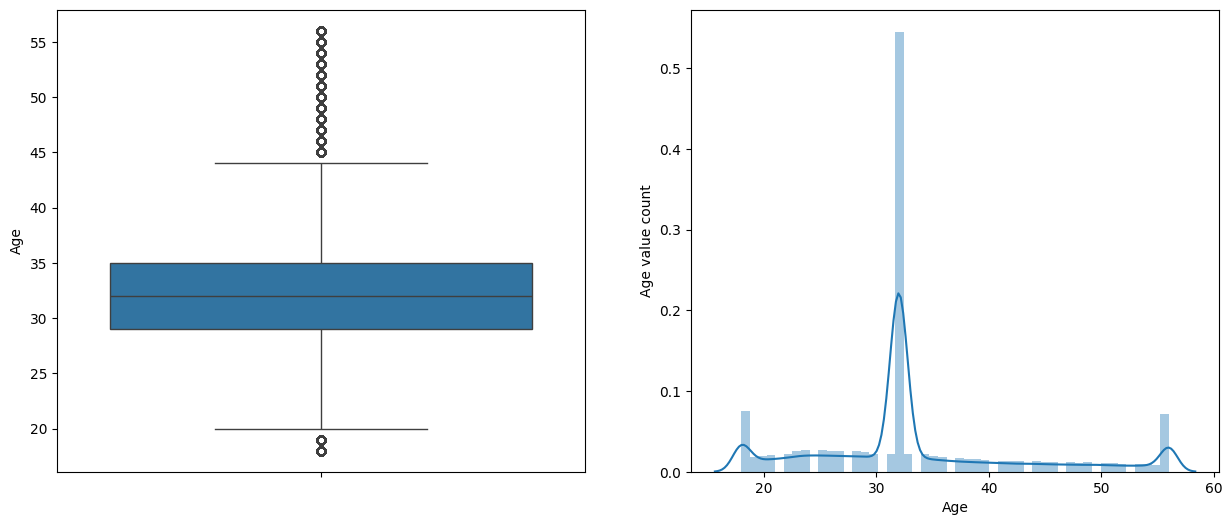

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=users["Age"])
fig.set_title('')
fig.set_ylabel("Age")

plt.subplot(1, 2, 2)
fig = sns.distplot(users["Age"].dropna())
fig.set_ylabel('Age value count')
fig.set_xlabel("Age")

plt.show()

In [ ]:
users['Age'].describe()

count    278858.000000
mean         33.402570
std           9.523058
min          18.000000
25%          29.000000
50%          32.000000
75%          35.000000
max          56.000000
Name: Age, dtype: float64

In [ ]:
users['locat']=users.Location.apply(lambda x: x.split(', '))
users['Country']=users.locat.apply(lambda x: x[2] if len(x)==3 else 'n/a')
users.drop('locat',axis=1,inplace=True)

In [ ]:
def show_missing():
    missing = books.columns[books.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(books[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(books[show_missing()].isnull().sum().sort_values(ascending = False)/len(books)*100,2))

Missing Data Count
Image-URL-L    3
Book-Author    2
Publisher      2
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Image-URL-L    0.0
Book-Author    0.0
Publisher      0.0
dtype: float64


In [ ]:
books.dropna(inplace=True)

In [ ]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [ ]:
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'])

In [ ]:
upper_lim = books['Year-Of-Publication'].quantile(.95)
lower_lim = books['Year-Of-Publication'].quantile(.05)
books.loc[(books["Year-Of-Publication"] > upper_lim),"Year-Of-Publication"] = upper_lim
books.loc[(books["Year-Of-Publication"] < lower_lim),"Year-Of-Publication"] = lower_lim

In [ ]:
print(upper_lim)
print(lower_lim)

2003.0
1976.0


In [ ]:
# Mendeteksi null pada dataset ratings
def show_missing():
    missing = ratings.columns[ratings.isnull().any()].tolist()
    return missing

print('Missing Data Count')
print(ratings[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(ratings[show_missing()].isnull().sum().sort_values(ascending = False)/len(ratings)*100,2))

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


##Data Cleaning

In [ ]:
users.head(1)

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",32.0,usa


In [ ]:
users.shape

(278858, 4)

In [ ]:
ratings.head(1)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0


In [ ]:
ratings.shape

(1149780, 3)

In [ ]:
data_users_ratings=pd.merge(users,ratings, on='User-ID')

In [ ]:
merged=pd.merge(books,data_users_ratings, on='ISBN')

In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031128 entries, 0 to 1031127
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031128 non-null  object 
 1   Book-Title           1031128 non-null  object 
 2   Book-Author          1031128 non-null  object 
 3   Year-Of-Publication  1031128 non-null  int64  
 4   Publisher            1031128 non-null  object 
 5   Image-URL-S          1031128 non-null  object 
 6   Image-URL-M          1031128 non-null  object 
 7   Image-URL-L          1031128 non-null  object 
 8   User-ID              1031128 non-null  int64  
 9   Location             1031128 non-null  object 
 10  Age                  1031128 non-null  float64
 11  Country              1031128 non-null  object 
 12  Book-Rating          1031128 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 102.3+ MB


In [ ]:
# Missing Value Count Function
def show_missing():
    missing = ratings.columns[ratings.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(ratings[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(ratings[show_missing()].isnull().sum().sort_values(ascending = False)/len(ratings)*100,2))

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


In [ ]:
merged.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Location,Age,Country,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,"stockton, new york, usa",18.0,usa,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,"timmins, ontario, canada",32.0,canada,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,"ottawa, ontario, canada",49.0,canada,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,"n/a, n/a, n/a",32.0,n/a,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,"sudbury, ontario, canada",32.0,canada,0


In [ ]:
merged.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'], axis=1,inplace=True)

In [ ]:
merged.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Location,Age,Country,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,"stockton, new york, usa",18.0,usa,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,"timmins, ontario, canada",32.0,canada,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,"ottawa, ontario, canada",49.0,canada,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,"n/a, n/a, n/a",32.0,n/a,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385,"sudbury, ontario, canada",32.0,canada,0


In [ ]:
np.set_printoptions(threshold=10)

In [ ]:
merged.ISBN.unique()

array(['0195153448', '0002005018', '0060973129', ..., '006008667X',
       '0192126040', '0767409752'], dtype=object)

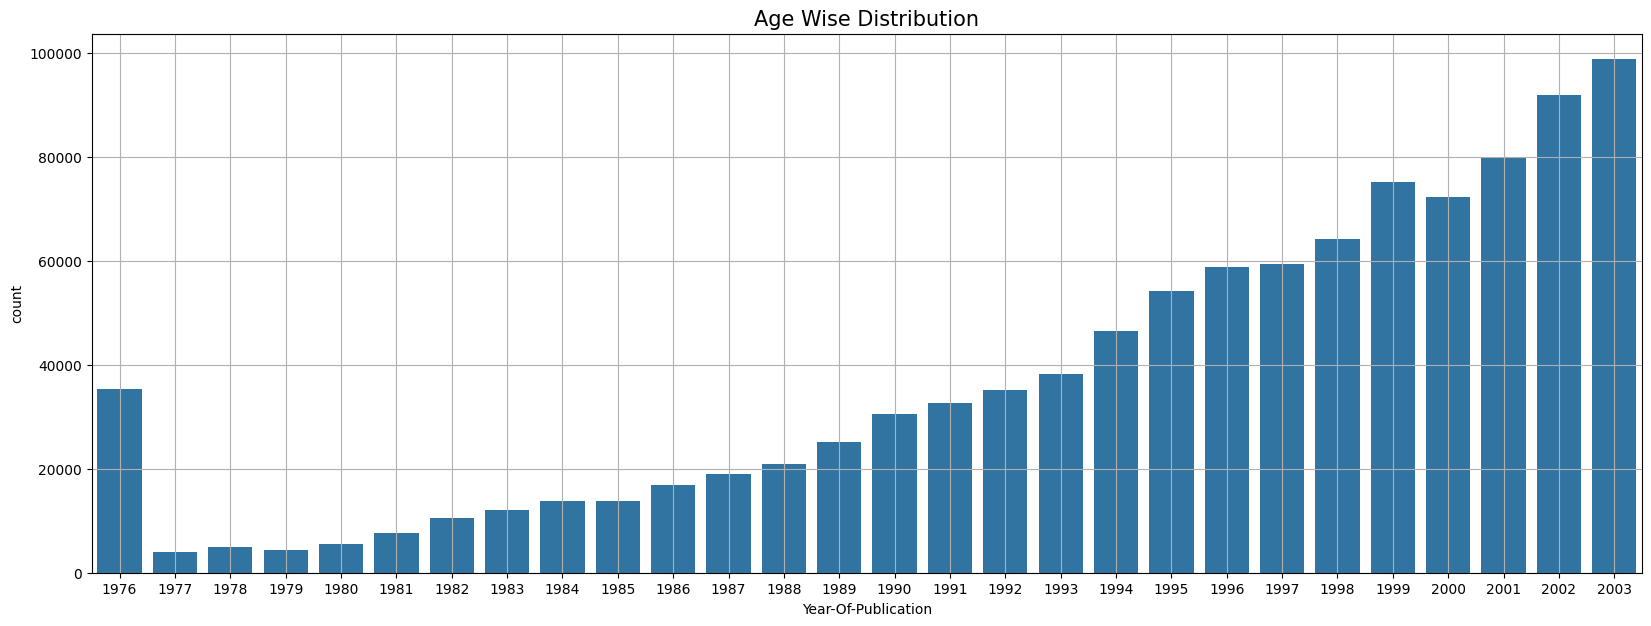

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(x = merged['Year-Of-Publication'])
plt.title('Age Wise Distribution',fontsize=15)
plt.grid()
plt.show()

In [ ]:
#Unique values of Year-Of-Publication'
merged['Year-Of-Publication'].unique()

array([2002, 2001, 1991, ..., 1989, 1984, 1977])

In [ ]:
merged.Country.value_counts()

Country
usa                                  745812
canada                                92954
n/a                                   37573
united kingdom                        32006
germany                               27654
                                      ...  
hungary"                                  1
c                                         1
samoa                                     1
zambia                                    1
usa (currently living in england)         1
Name: count, Length: 281, dtype: int64

In [ ]:
#checking duplicates
merged.duplicated().any()

False

##EDA

##Pembuatan Model

In [ ]:
from keras.models import Model
from keras.layers import Embedding, Input, Flatten, Concatenate, Dense
from keras.optimizers import Adam

In [ ]:
books_interactions_count = merged.groupby(['ISBN', 'User-ID']).size().groupby('ISBN').size().reset_index(name='interaction_count')

# Filter out ISBNs with fewer than 15 interactions
filtered_ISBNs = books_interactions_count[books_interactions_count['interaction_count'] >= 500]['ISBN']

# Filter the merged DataFrame based on the ISBNs with at least 15 interactions
merged_filtered = merged[merged['ISBN'].isin(filtered_ISBNs)]
print(merged_filtered)


              ISBN                  Book-Title   Book-Author  \
769     0971880107                 Wild Animus  Rich Shapero   
770     0971880107                 Wild Animus  Rich Shapero   
771     0971880107                 Wild Animus  Rich Shapero   
772     0971880107                 Wild Animus  Rich Shapero   
773     0971880107                 Wild Animus  Rich Shapero   
...            ...                         ...           ...   
168990  0316601950  The Pilot's Wife : A Novel  Anita Shreve   
168991  0316601950  The Pilot's Wife : A Novel  Anita Shreve   
168992  0316601950  The Pilot's Wife : A Novel  Anita Shreve   
168993  0316601950  The Pilot's Wife : A Novel  Anita Shreve   
168994  0316601950  The Pilot's Wife : A Novel  Anita Shreve   

        Year-Of-Publication       Publisher  User-ID  \
769                    2003         Too Far       14   
770                    2003         Too Far      193   
771                    2003         Too Far      242   
772    

In [ ]:
print(len(merged_filtered))

13993


In [ ]:
# Create user and item embeddings
merged2 = merged_filtered
n_data = len(merged2)
unique_count_user = merged2['User-ID'].nunique()
unique_count_item = merged2['Book-Title'].nunique()
user_input = Input(shape=(1,))
item_input = Input(shape=(1,))
user_embedding = Embedding(input_dim=n_data, output_dim=unique_count_user)(user_input)
item_embedding = Embedding(input_dim=n_data, output_dim=unique_count_item)(item_input)
print(item_embedding)




KerasTensor(type_spec=TensorSpec(shape=(None, 1, 19), dtype=tf.float32, name=None), name='embedding_1/embedding_lookup/Identity:0', description="created by layer 'embedding_1'")


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'merged_filtered' is your DataFrame containing User-ID, Book-Title, and Book-Rating

# Create a label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'Book-Title' column
merged_filtered['Book-Title'] = label_encoder.fit_transform(merged_filtered['Book-Title'])
merged_filtered['User-ID'] = label_encoder.fit_transform(merged_filtered['User-ID'])

# Get the number of unique users and items
unique_users = merged_filtered['User-ID'].nunique()
unique_items = merged_filtered['Book-Title'].nunique()

# Define input layers
user_input = Input(shape=(1,))
item_input = Input(shape=(1,))

# Create user and item embeddings
user_embedding = Embedding(input_dim=unique_users, output_dim=10)(user_input)
item_embedding = Embedding(input_dim=unique_items, output_dim=10)(item_input)

In [ ]:
unique_users = merged_filtered['User-ID'].nunique()
unique_items = merged_filtered['Book-Title'].nunique()
print(f"Unique Users: {unique_users}, Unique Items: {unique_items}")

print(f"Max User-ID: {merged_filtered['User-ID'].max()}, Max Book-Title: {merged_filtered['Book-Title'].max()}")


Unique Users: 8534, Unique Items: 19
Max User-ID: 8533, Max Book-Title: 18


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Assuming 'merged_filtered' is your DataFrame containing User-ID, Book-Title, and Book-Rating

# Create label encoders for users and books
user_label_encoder = LabelEncoder()
book_label_encoder = LabelEncoder()

# Fit and transform the 'User-ID' and 'Book-Title' columns
merged_filtered['User-ID'] = user_label_encoder.fit_transform(merged_filtered['User-ID'])
merged_filtered['Book-Title'] = book_label_encoder.fit_transform(merged_filtered['Book-Title'])

# Get the number of unique users and items
unique_users = merged_filtered['User-ID'].nunique()
unique_items = merged_filtered['Book-Title'].nunique()

# Define input layers
user_input = Input(shape=(1,))
item_input = Input(shape=(1,))

# Create user and item embeddings
user_embedding = Embedding(input_dim=unique_users, output_dim=10)(user_input)
item_embedding = Embedding(input_dim=unique_items, output_dim=10)(item_input)

# Flatten the embeddings
user_vecs = Flatten()(user_embedding)
item_vecs = Flatten()(item_embedding)

# Concatenate user and item vectors
concat = Concatenate()([user_vecs, item_vecs])

# Add hidden layers
x = Dense(64, activation='relu')(concat)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
output = Dense(1)(x)

# Define the model
model = Model(inputs=[user_input, item_input], outputs=output)

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Convert 'User-ID' and 'Book-Title' columns to numeric types
merged_filtered['User-ID'] = merged_filtered['User-ID'].astype('int')
merged_filtered['Book-Title'] = merged_filtered['Book-Title'].astype('int')

# Split the data into training and testing sets
train_data, test_data = train_test_split(merged_filtered, test_size=0.2, random_state=42)

# Train the model
model.fit(
    [train_data['User-ID'], train_data['Book-Title']],
    train_data['Book-Rating'],
    epochs=10,
    batch_size=1,
    verbose=1
)

# Predict on the test set
predictions = model.predict([test_data['User-ID'], test_data['Book-Title']])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Book-Rating'], predictions))
print(f"RMSE: {rmse}")

# Print predictions
print(predictions)


Epoch 1/10
11194/11194 [==============================] - 42s 3ms/step - loss: 14.7550
Epoch 2/10
11194/11194 [==============================] - 38s 3ms/step - loss: 8.2833
Epoch 3/10
11194/11194 [==============================] - 44s 4ms/step - loss: 6.9785
Epoch 4/10
11194/11194 [==============================] - 39s 4ms/step - loss: 6.1501
Epoch 5/10
11194/11194 [==============================] - 41s 4ms/step - loss: 5.5439
Epoch 6/10
11194/11194 [==============================] - 39s 3ms/step - loss: 4.9542
Epoch 7/10
11194/11194 [==============================] - 36s 3ms/step - loss: 4.4654
Epoch 8/10
11194/11194 [==============================] - 39s 3ms/step - loss: 4.0638
Epoch 9/10
11194/11194 [==============================] - 39s 3ms/step - loss: 3.6956
Epoch 10/10
88/88 [==============================] - 0s 2ms/step
RMSE: 4.124983488088616
[[6.1390924]
 [2.45664  ]
 [4.6403065]
 ...
 [3.4324098]
 [5.2085695]
 [7.436047 ]]
